# Python import statement

In [1]:
# !pip install shap
# !pip install --upgrade numpy
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns
# import shap

# sklearn 
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report

# Take Data

In [2]:
data = pd.read_csv('Foreign_Tourist_Survey_Data(2023-2024).csv')

In [4]:
features_for_clustering = [
    'Visit_Type', 'Main_purpose', 'Reason_traveling',
    'Companion_Type', 'Main_Visited_Region',
    'Total_period_of_stay', 'Total_Expenditure_PerPerson',
    'Daily_Expenditure_PerPerson',
    'Participated_Activities',
    'Gender', 'Age'
]

In [5]:
df = data[features_for_clustering]

In [6]:
df.head()

,Visit_Type,Main_purpose,Reason_traveling,Companion_Type,Main_Visited_Region,Total_period_of_stay,Total_Expenditure_PerPerson,Daily_Expenditure_PerPerson,Participated_Activities,Gender,Age
0,별여행,"여가, 위락, 휴식",경험/호감,단독 여행,서울,27,1633.63664,60.505061,음식/쇼핑 관련,여성,20대
1,별여행,"친구, 친지 방문",경험/호감,단독 여행,서울,7,2007.30400,286.757714,휴양/자연 관련,남성,30대
2,별여행,기타,미상,단독 여행,인천,2,1650.00000,825.000000,미상,여성,15-19세
3,별여행,사업 또는 전문 활동,미상,단독 여행,서울,8,3586.80000,448.350000,미상,남성,50대
4,별여행,"친구, 친지 방문",콘텐츠 영향,단독 여행,서울,71,2151.56000,NaN,음식/쇼핑 관련,여성,40대


In [7]:
df.describe()

,Total_period_of_stay,Total_Expenditure_PerPerson,Daily_Expenditure_PerPerson
count,32412.000000,32412.000000,31545.000000
mean,10.056306,2230.035135,332.544407
std,13.603305,1820.172592,272.783773
min,1.000000,325.580000,22.000000
25%,4.000000,1040.500000,177.250000
50%,6.000000,1685.080000,258.000000
75%,9.000000,2785.101750,386.169000
max,91.000000,12072.500000,1760.792000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Visit_Type                   32412 non-null  object 
 1   Main_purpose                 32412 non-null  object 
 2   Reason_traveling             32412 non-null  object 
 3   Companion_Type               32412 non-null  object 
 4   Main_Visited_Region          32412 non-null  object 
 5   Total_period_of_stay         32412 non-null  int64  
 6   Total_Expenditure_PerPerson  32412 non-null  float64
 7   Daily_Expenditure_PerPerson  31545 non-null  float64
 8   Participated_Activities      32412 non-null  object 
 9   Gender                       32412 non-null  object 
 10  Age                          32412 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.7+ MB


In [9]:
df.columns.tolist()

['Visit_Type',
 'Main_purpose',
 'Reason_traveling',
 'Companion_Type',
 'Main_Visited_Region',
 'Total_period_of_stay',
 'Total_Expenditure_PerPerson',
 'Daily_Expenditure_PerPerson',
 'Participated_Activities',
 'Gender',
 'Age']

In [10]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Data Preprocessing: Handling Categorical and Numerical Features with Pipelines

In [11]:
# Identify the features that need to be processed
categorical_features_onehot = ["Visit_Type", "Main_purpose", "Reason_traveling",'Companion_Type', 
                               'Main_Visited_Region','Participated_Activities','Gender', 'Age']
numerical_features = ["Total_period_of_stay", "Total_Expenditure_PerPerson", "Daily_Expenditure_PerPerson"]

#Create preprocessing steps for each feature type
categorical_transformer_onehot = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", drop=None, sparse=False))
    ])

numerical_transformer = Pipeline(
    steps=[
        ("encoder", PowerTransformer())
    ])
# Create a ColumnTransformer to apply preprocessing steps to each feature type
preprocessor = ColumnTransformer(transformers=[
    ('cat_onehot', categorical_transformer_onehot, categorical_features_onehot),
    ('num', numerical_transformer, numerical_features)
])
# Create pipeline 
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
)
# Fit pipeline
pipe_fit = pipeline.fit(df)

# Get the characteristic name of OneHotEncoder
onehot_feature_names = pipe_fit.named_steps['preprocessor'].named_transformers_['cat_onehot'].named_steps['encoder'].get_feature_names_out(categorical_features_onehot)

# Get the characteristic name of PowerTransformer
numerical_feature_names = pipe_fit.named_steps['preprocessor'].named_transformers_['num'].named_steps['encoder'].get_feature_names_out(numerical_features)

# Aggregate all feature names, including direct classification features
all_feature_names = np.concatenate([onehot_feature_names, numerical_feature_names])

# Converts the data to a DataFrame with the specified characteristic name
data_clear = pd.DataFrame(pipe_fit.transform(df), columns=all_feature_names)

In [18]:
# data_clear.columns.tolist()

In [12]:
data_clear

,Visit_Type_Air-tel package,Visit_Type_단체여행,Visit_Type_별여행,Main_purpose_교육,Main_purpose_기타,Main_purpose_사업 또는 전문 활동,"Main_purpose_여가, 위락, 휴식","Main_purpose_친구, 친지 방문",Reason_traveling_가격/거리,Reason_traveling_경험/호감,...,Gender_여성,Age_15-19세,Age_20대,Age_30대,Age_40대,Age_50대,Age_60대 이상,Total_period_of_stay,Total_Expenditure_PerPerson,Daily_Expenditure_PerPerson
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.701517,-0.047213,-2.050665
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.215685,0.247191,0.123984
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.426059,-0.032822,1.681742
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.421593,1.043569,0.775118
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.186990,0.344967,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.370397,-1.674781,-1.200657
32408,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.370397,-2.532219,-2.232093
32409,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.370397,0.648400,1.036956
32410,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.370397,-1.207935,-0.790038


In [13]:
import numpy as np

print("NaN:", data_clear.isna().sum().sum())
print("Inf:", np.isinf(data_clear).sum().sum())
print("Max:", data_clear.max().max())
print("Min:", data_clear.min().min())


NaN: 867
Inf: 0
Max: 2.8381419420970513
Min: -4.225253781847803


In [14]:
data['Daily_Expenditure_PerPerson'].isna().sum()

867

In [15]:
data['Total_Expenditure_PerPerson'].isna().sum()

0

In [16]:
mean_value = data_clear['Daily_Expenditure_PerPerson'].mean()
data_clear['Daily_Expenditure_PerPerson'].fillna(mean_value, inplace=True)

# Outlier Detection and Removal Using ECOD Algorithm

In [18]:
from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(data_clear)
outliers = clf.predict(data_clear) 

data_clear["outliers"] = outliers
# df["outliers"] = outliers
df.loc[:, "outliers"] = outliers

# Data without outliers
data_no_outliers = data_clear[data_clear["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data_clear.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

In [19]:
print(df.shape)

(32412, 12)


In [20]:

print(data_clear.shape)

(32412, 58)


In [21]:
print(data_no_outliers.shape)
print(data_with_outliers.shape)

(29170, 57)
(32412, 57)


# Determining Optimal Number of Clusters using the Elbow Method (K-Means)

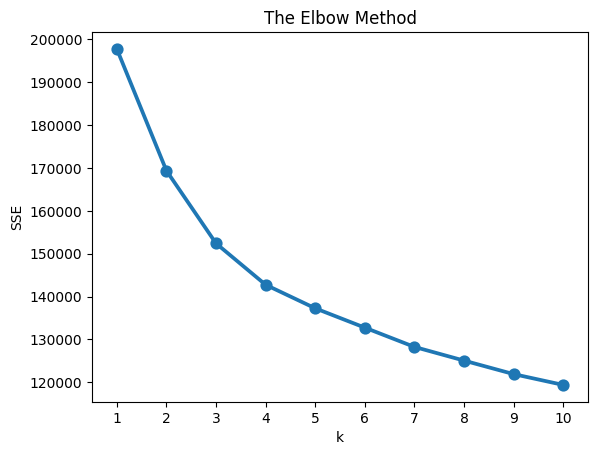

In [22]:
# cluster 
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_no_outliers)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# K-Means Clustering with 5 Clusters (K=5)

In [23]:
km = KMeans(n_clusters= 5 , 
            init= 'k-means++' , 
            n_init= 10 , 
            max_iter= 100 , 
            random_state= 42 ) 

clusters_predict = km.fit_predict(data_no_outliers) 

## Evaluation

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 2.377371354234449
Calinski Score: 3215.376747606405
Silhouette Score: 0.10117377178705125


# Dimensionality Reduction using PCA (90% Variance Retained)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(data_no_outliers)

In [26]:
km1 = KMeans(n_clusters= 5 , 
            init= 'k-means++' , 
            n_init= 10 , 
            max_iter= 100 , 
            random_state= 42 ) 

clusters_predict_1 = km.fit_predict(pca_data) 

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print(f"Davies bouldin score: {davies_bouldin_score(pca_data,clusters_predict_1)}")
print(f"Calinski Score: {calinski_harabasz_score(pca_data,clusters_predict_1)}")
print(f"Silhouette Score: {silhouette_score(pca_data,clusters_predict_1)}")

Davies bouldin score: 2.1957383715494947
Calinski Score: 3736.8586789198675
Silhouette Score: 0.12207877980859508


# 3D Dimensionality Reduction for Visualization using t-SNE

In [34]:
from sklearn.manifold import TSNE
pca_df = pd.DataFrame(pca_data)
sampling_data = pca_df.sample(frac=0.5, replace=False, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict_1).sample(frac=0.5, replace=True, random_state=1)[0].values

df_tsne_3d = TSNE(
                  n_components=3, 
                  learning_rate=500, 
                  init='random', 
                  perplexity=200, 
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = sampling_clusters

# Visualizations 

In [35]:
import plotly.express as px

def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    fig = px.scatter_3d(
          df, 
          x='comp1', 
          y='comp2', 
          z='comp3',
          color='cluster',
          template="plotly",

          # symbol = "cluster",

          color_discrete_sequence=px.colors.qualitative.Vivid,
          title=title).update_traces(
              # mode = 'markers',
              marker={
                  "size": 4,
                  "opacity": opacity,
                  # "symbol" : "diamond",
                  "line": {
                      "width": width_line,
                      "color": "black",
                  }
              }
          ).update_layout(
                  width = 800, 
                  height = 800, 
                  autosize = True, 
                  showlegend = True,
                  legend=dict(title_font_family="Times New Roman",
                              font=dict(size= 20)),
                  scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                              yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                              zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                  font = dict(family = "Gilroy", color  = 'black', size = 15))

    fig.show()


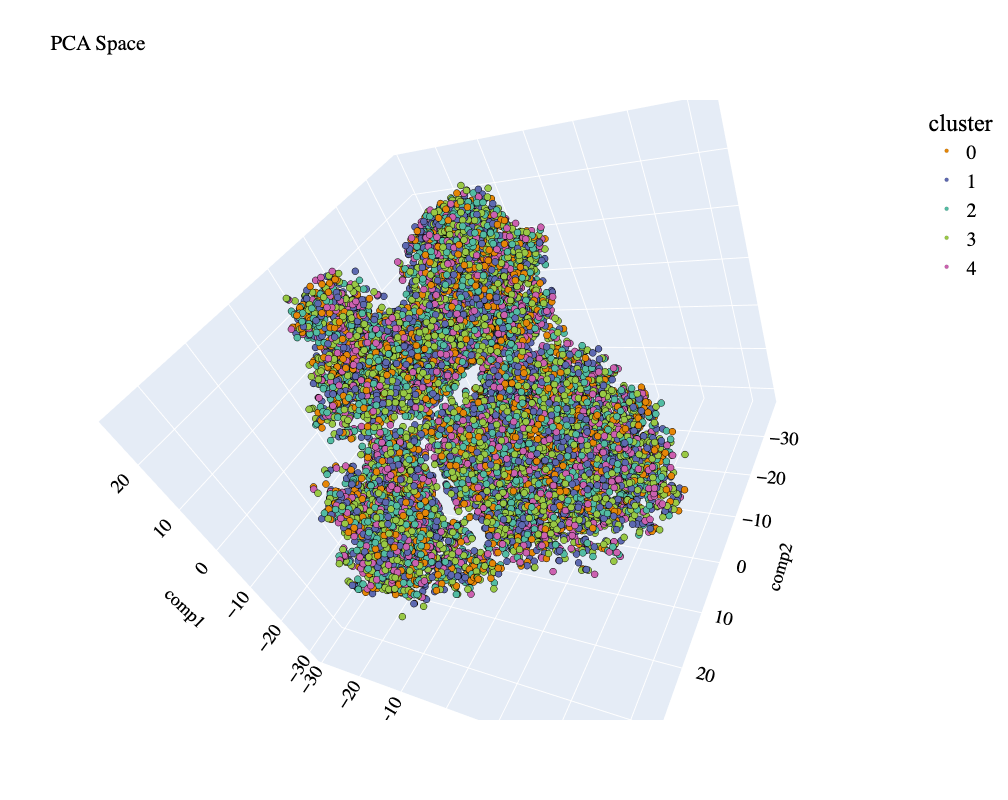

In [36]:
plot_pca_3d(df_tsne_3d, title = "PCA Space", opacity=1, width_line = 0.1)

In [37]:
print(len(df))      
print(len(outliers))            

32412
32412


In [38]:
df.head()

,Visit_Type,Main_purpose,Reason_traveling,Companion_Type,Main_Visited_Region,Total_period_of_stay,Total_Expenditure_PerPerson,Daily_Expenditure_PerPerson,Participated_Activities,Gender,Age,outliers
0,별여행,"여가, 위락, 휴식",경험/호감,단독 여행,서울,27,1633.63664,60.505061,음식/쇼핑 관련,여성,20대,0
1,별여행,"친구, 친지 방문",경험/호감,단독 여행,서울,7,2007.30400,286.757714,휴양/자연 관련,남성,30대,0
2,별여행,기타,미상,단독 여행,인천,2,1650.00000,825.000000,미상,여성,15-19세,1
3,별여행,사업 또는 전문 활동,미상,단독 여행,서울,8,3586.80000,448.350000,미상,남성,50대,0
4,별여행,"친구, 친지 방문",콘텐츠 영향,단독 여행,서울,71,2151.56000,NaN,음식/쇼핑 관련,여성,40대,0


In [42]:
print(len(df))  
print(df['outliers'].value_counts()) 
print(len(df_no_outliers)) 
print(len(clusters_predict)) 

32412
outliers
0    29170
1     3242
Name: count, dtype: int64
29170
29170


# Cluster Profiling: Summarizing Features by Cluster

In [41]:
df_no_outliers = df[df.outliers == 0].copy()
df_no_outliers["cluster"] = clusters_predict

In [45]:
summary = df_no_outliers.groupby('cluster').agg({
    'Visit_Type': lambda x: x.value_counts().index[0],
    'Main_purpose': lambda x: x.value_counts().index[0],
    'Reason_traveling': lambda x: x.value_counts().index[0],
    'Companion_Type': lambda x: x.value_counts().index[0],
    'Main_Visited_Region': lambda x: x.value_counts().index[0],
    'Participated_Activities': lambda x: x.value_counts().index[0],
    'Gender': lambda x: x.value_counts().index[0],
    'Age': lambda x: x.value_counts().index[0],
    'Total_period_of_stay': lambda x: round(x.mean(), 2),
    'Total_Expenditure_PerPerson': lambda x: round(x.mean(), 2),
    'Daily_Expenditure_PerPerson': lambda x: round(x.mean(), 2)
}).reset_index()

In [46]:
summary 

,cluster,Visit_Type,Main_purpose,Reason_traveling,Companion_Type,Main_Visited_Region,Participated_Activities,Gender,Age,Total_period_of_stay,Total_Expenditure_PerPerson,Daily_Expenditure_PerPerson
0,0,별여행,"여가, 위락, 휴식",경험/호감,단독 여행,서울,음식/쇼핑 관련,여성,20대,25.95,3115.02,178.61
1,1,별여행,"여가, 위락, 휴식",콘텐츠 영향,친구 여행,서울,음식/쇼핑 관련,여성,20대,3.82,984.05,267.33
2,2,별여행,사업 또는 전문 활동,미상,단독 여행,서울,음식/쇼핑 관련,남성,30대,5.62,2640.89,496.48
3,3,별여행,"여가, 위락, 휴식",경험/호감,가족 여행,서울,음식/쇼핑 관련,여성,30대,6.64,1147.70,183.71
4,4,별여행,"여가, 위락, 휴식",경험/호감,가족 여행,서울,음식/쇼핑 관련,여성,20대,6.63,3166.19,505.96


# Push into Csv and excel files 

In [49]:
summary.to_excel('/Users/nguyentoan/Desktop/summary_clusters.xlsx', index=False)

In [50]:
summary.to_csv('/Users/nguyentoan/Desktop/summary_clusters.csv', index=False)